In [93]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0dafefbc-7189-4ec3-9494-28bb0c3e77b1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [94]:
type(data)

dict

In [95]:
import pandas as pd

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [96]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12034,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19851631.00000,19851631.00000,False,NaN,1,None,None,None,2025-04-15T10:33:00.000Z,85702.17158,29335027706.37414,-4.68860,-0.12060,1.19417,8.51183,2.31727,-11.66131,-11.71992,1701327886180.55444,62.93570,1799745603260.09009,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
1,1027,Ethereum,ETH,ethereum,10132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120693086.87372,120693086.87372,True,NaN,2,None,None,None,2025-04-15T10:33:00.000Z,1632.66684,14597586613.32973,-7.63610,-0.63211,-2.08998,4.00580,-14.40818,-39.70845,-49.22773,197051600863.12680,7.28930,197051600863.13000,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
2,825,Tether USDt,USDT,tether,124114,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,144573605875.57089,148058994469.39545,True,NaN,3,None,None,None,2025-04-15T10:32:00.000Z,0.99993,57541769882.96304,-11.26890,0.00365,0.02233,0.01536,-0.01388,-0.01313,0.03530,144563387583.20465,5.34770,148048529833.85999,None,2025-04-15T10:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-15 16:04:03.751718
3,52,XRP,XRP,xrp,1589,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58338141684.00000,99986253154.00000,False,NaN,4,None,None,None,2025-04-15T10:33:00.000Z,2.15939,3016882206.18402,-26.39070,-0.55669,0.73286,14.68116,-8.04866,-21.13364,-23.84570,125974565746.87036,4.66010,215938598848.82001,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
4,1839,BNB,BNB,bnb,2469,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142470398.86000,142470398.86000,False,NaN,5,None,None,None,2025-04-15T10:33:00.000Z,589.00309,1350657151.48982,-2.25840,-0.13949,-0.23242,5.65373,-1.73761,-13.08148,-15.11746,83915505564.14819,3.10420,83915505564.14999,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
5,5426,Solana,SOL,solana,898,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,516227573.89035,598580108.47307,True,NaN,6,None,None,None,2025-04-15T10:33:00.000Z,132.44578,3656620094.35496,-14.00460,-0.26762,-0.73941,21.72131,-0.56627,-33.83250,-29.44874,68372163035.74134,2.52920,79279408610.52000,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
6,3408,USDC,USDC,usd-coin,27100,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,60328255183.08590,60328255183.08590,False,NaN,7,None,None,None,2025-04-15T10:32:00.000Z,0.99996,10450796459.75113,3.14580,-0.00001,0.01104,-0.00821,-0.00262,-0.00085,0.01485,60325894311.60780,2.23160,60325894311.61000,None,2025-04-15T10:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-15 16:04:03.751718
7,74,Dogecoin,DOGE,dogecoin,1203,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148861276383.70520,148861276383.70520,True,NaN,8,None,None,None,2025-04-15T10:33:00.000Z,0.16001,895593650.79506,-5.53000,-0.17305,-2.82104,6.11051,-6.71943,-41.15934,-55.04481,23819878108.90934,0.88110,23819878108.91000,No

In [97]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0dafefbc-7189-4ec3-9494-28bb0c3e77b1',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
        if 'data' in data and data['data']:
            df2 = pd.json_normalize(data['data'])
            df2['timestamp'] = pd.to_datetime('now')
            df = pd.concat([df, df2])

        else:
            print('No new data received')
    
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    if not os.path.isfile(r'C:\Users\nikit\Downloads\Python Folder\DataSet\Data Output\API.csv'):
        df.to_csv(r'C:\Users\nikit\Downloads\Python Folder\DataSet\Data Output\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\nikit\Downloads\Python Folder\DataSet\Data Output\API.csv', mode = 'a', header = 'False')



In [98]:
import os
from time import time
from time import sleep

for i in range(330):
    api_runner()
    print('api_ runner completed')
    sleep(60)
exit()

api_ runner completed
api_ runner completed
api_ runner completed


KeyboardInterrupt: 

In [6]:
df3 = pd.read_csv(r'C:\Users\nikit\Downloads\Python Folder\DataSet\Data Output\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0.0,1,Bitcoin,BTC,bitcoin,12032,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19851175.0,19851175.0,False,NaN,1,NaN,NaN,NaN,2025-04-14T12:41:00.000Z,85152.52475599844,31153408355.23646,8.2354,0.38829349,0.89833271,10.64763368,1.09720719,-11.35510075,-11.47450003,1690377670623.1575,62.6099,1788203019875.97,NaN,2025-04-14T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-14 18:12:15.773839
1,1.0,1027,Ethereum,ETH,ethereum,10131,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120690639.42094985,120690639.42094985,True,NaN,2,NaN,NaN,NaN,2025-04-14T12:41:00.000Z,1674.6979668971433,16978895116.295982,32.4801,0.08962398,4.3891725,11.18619512,-13.13058141,-37.23927235,-47.55557249,202120368461.7809,7.4863,202120368461.78,NaN,2025-04-14T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-14 18:12:15.773839
2,2.0,825,Tether USDt,USDT,tether,124004,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,144343504474.9362,148058994474.65076,True,NaN,3,NaN,NaN,NaN,2025-04-14T12:40:00.000Z,0.9997864667238994,66430145627.26323,12.1017,0.00063462,0.01393148,0.01739092,-0.04069263,-0.03082621,0.03521106,144312682333.5418,5.3452,148027378952.5,NaN,2025-04-14T12:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-14 18:12:15.773839
3,3.0,52,XRP,XRP,xrp,1588,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0,58338141684.0,99986253154.0,False,NaN,4,NaN,NaN,NaN,2025-04-14T12:41:00.000Z,2.163469361127467,3809563497.2652283,-14.6202,0.50813506,-0.69397407,21.28542879,-10.89985371,-11.73405635,-15.56733961,126212782118.44714,4.6748,216346936112.75,NaN,2025-04-14T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-14 18:12:15.773839
4,4.0,1839,BNB,BNB,bnb,2467,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142470483.82,142470483.82,False,NaN,5,NaN,NaN,NaN,2025-04-14T12:41:00.000Z,591.2998052599708,1383210980.8020413,6.112,-0.12396233,0.68373567,8.38937659,-1.05234822,-16.00164226,-14.65386568,84242769338.05981,3.1203,84242769338.06,NaN,2025-04-14T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-14 18:12:15.773839
5,5.0,5426,Solana,SOL,solana,897,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,516091215.92399615,598430384.7124623,True,NaN,6,NaN,NaN,NaN,2025-04-14T12:41:00.000Z,133.63080715557325,4313581118.727641,1.939,0.44232065,3.03158375,31.71475085,-0.52783508,-30.43066164,-28.4765986,68965685749.82484,2.5544,79968735335.55,NaN,2025-04-14T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-14 18:12:15.773839
6,6.0,3408,USDC,USDC,usd-coin,27075,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,60179780031.2203,60179780031.2203,False,NaN,7,NaN,NaN,NaN,2025-04-14T12:41:00.000Z,0.999825309446293,10440747035.373362,26.786,-0.01333886,-0.00934093,-0.02267204,-0.014655,-0.02023793,0.00480731,60169267192.12468,2.2286,60169267192.12,NaN,2025-04-14T12:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-14 18:12:15.773839
7,7.0,74,Dogecoin,DOGE,dogecoin,1203,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,148848896383.7052,148848896383.7052,True,NaN,8,NaN,NaN,NaN,2025-04-14T12:41:00.000Z,0.166392020

In [99]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12034,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19851631.00000,19851631.00000,False,NaN,1,None,None,None,2025-04-15T10:33:00.000Z,85702.17158,29335027706.37414,-4.68860,-0.12060,1.19417,8.51183,2.31727,-11.66131,-11.71992,1701327886180.55444,62.93570,1799745603260.09009,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
1,1027,Ethereum,ETH,ethereum,10132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120693086.87372,120693086.87372,True,NaN,2,None,None,None,2025-04-15T10:33:00.000Z,1632.66684,14597586613.32973,-7.63610,-0.63211,-2.08998,4.00580,-14.40818,-39.70845,-49.22773,197051600863.12680,7.28930,197051600863.13000,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
2,825,Tether USDt,USDT,tether,124114,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,144573605875.57089,148058994469.39545,True,NaN,3,None,None,None,2025-04-15T10:32:00.000Z,0.99993,57541769882.96304,-11.26890,0.00365,0.02233,0.01536,-0.01388,-0.01313,0.03530,144563387583.20465,5.34770,148048529833.85999,None,2025-04-15T10:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-15 16:04:03.751718
3,52,XRP,XRP,xrp,1589,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58338141684.00000,99986253154.00000,False,NaN,4,None,None,None,2025-04-15T10:33:00.000Z,2.15939,3016882206.18402,-26.39070,-0.55669,0.73286,14.68116,-8.04866,-21.13364,-23.84570,125974565746.87036,4.66010,215938598848.82001,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
4,1839,BNB,BNB,bnb,2469,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142470398.86000,142470398.86000,False,NaN,5,None,None,None,2025-04-15T10:33:00.000Z,589.00309,1350657151.48982,-2.25840,-0.13949,-0.23242,5.65373,-1.73761,-13.08148,-15.11746,83915505564.14819,3.10420,83915505564.14999,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
5,5426,Solana,SOL,solana,898,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,516227573.89035,598580108.47307,True,NaN,6,None,None,None,2025-04-15T10:33:00.000Z,132.44578,3656620094.35496,-14.00460,-0.26762,-0.73941,21.72131,-0.56627,-33.83250,-29.44874,68372163035.74134,2.52920,79279408610.52000,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
6,3408,USDC,USDC,usd-coin,27100,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,60328255183.08590,60328255183.08590,False,NaN,7,None,None,None,2025-04-15T10:32:00.000Z,0.99996,10450796459.75113,3.14580,-0.00001,0.01104,-0.00821,-0.00262,-0.00085,0.01485,60325894311.60780,2.23160,60325894311.61000,None,2025-04-15T10:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-15 16:04:03.751718
7,74,Dogecoin,DOGE,dogecoin,1203,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148861276383.70520,148861276383.70520,True,NaN,8,None,None,None,2025-04-15T10:33:00.000Z,0.16001,895593650.79506,-5.53000,-0.17305,-2.82104,6.11051,-6.71943,-41.15934,-55.04481,23819878108.90934,0.88110,23819878108.91000,No

In [100]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12034,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19851631.00000,19851631.00000,False,NaN,1,None,None,None,2025-04-15T10:33:00.000Z,85702.17158,29335027706.37414,-4.68860,-0.12060,1.19417,8.51183,2.31727,-11.66131,-11.71992,1701327886180.55444,62.93570,1799745603260.09009,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
1,1027,Ethereum,ETH,ethereum,10132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120693086.87372,120693086.87372,True,NaN,2,None,None,None,2025-04-15T10:33:00.000Z,1632.66684,14597586613.32973,-7.63610,-0.63211,-2.08998,4.00580,-14.40818,-39.70845,-49.22773,197051600863.12680,7.28930,197051600863.13000,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
2,825,Tether USDt,USDT,tether,124114,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,144573605875.57089,148058994469.39545,True,NaN,3,None,None,None,2025-04-15T10:32:00.000Z,0.99993,57541769882.96304,-11.26890,0.00365,0.02233,0.01536,-0.01388,-0.01313,0.03530,144563387583.20465,5.34770,148048529833.85999,None,2025-04-15T10:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-15 16:04:03.751718
3,52,XRP,XRP,xrp,1589,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58338141684.00000,99986253154.00000,False,NaN,4,None,None,None,2025-04-15T10:33:00.000Z,2.15939,3016882206.18402,-26.39070,-0.55669,0.73286,14.68116,-8.04866,-21.13364,-23.84570,125974565746.87036,4.66010,215938598848.82001,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
4,1839,BNB,BNB,bnb,2469,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142470398.86000,142470398.86000,False,NaN,5,None,None,None,2025-04-15T10:33:00.000Z,589.00309,1350657151.48982,-2.25840,-0.13949,-0.23242,5.65373,-1.73761,-13.08148,-15.11746,83915505564.14819,3.10420,83915505564.14999,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
5,5426,Solana,SOL,solana,898,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,516227573.89035,598580108.47307,True,NaN,6,None,None,None,2025-04-15T10:33:00.000Z,132.44578,3656620094.35496,-14.00460,-0.26762,-0.73941,21.72131,-0.56627,-33.83250,-29.44874,68372163035.74134,2.52920,79279408610.52000,None,2025-04-15T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 16:04:03.751718
6,3408,USDC,USDC,usd-coin,27100,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,60328255183.08590,60328255183.08590,False,NaN,7,None,None,None,2025-04-15T10:32:00.000Z,0.99996,10450796459.75113,3.14580,-0.00001,0.01104,-0.00821,-0.00262,-0.00085,0.01485,60325894311.60780,2.23160,60325894311.61000,None,2025-04-15T10:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-15 16:04:03.751718
7,74,Dogecoin,DOGE,dogecoin,1203,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148861276383.70520,148861276383.70520,True,NaN,8,None,None,None,2025-04-15T10:33:00.000Z,0.16001,895593650.79506,-5.53000,-0.17305,-2.82104,6.11051,-6.71943,-41.15934,-55.04481,23819878108.90934,0.88110,23819878108.91000,No

In [101]:
df4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.08751,1.19076,8.44539,2.28438,-11.69277,-11.74255
Ethereum,-0.67662,-2.16407,3.83099,-14.50726,-39.78369,-49.28055
Tether USDt,0.00447,0.02152,0.02049,-0.00621,-0.01331,0.03877
XRP,-0.54250,0.61780,14.57655,-8.10853,-21.21651,-23.86846
BNB,-0.17144,-0.29280,5.61506,-1.76876,-13.08218,-15.14510
Solana,-0.30102,-0.83212,21.56740,-0.66368,-33.90720,-29.51939
USDC,-0.00371,0.01098,-0.00884,0.00448,0.00038,0.00859
Dogecoin,-0.24722,-2.95129,5.98685,-6.81586,-41.21717,-55.08869
TRON,-1.35961,-3.24031,5.74342,14.88047,6.74618,10.92933


In [102]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.08751
              quote.USD.percent_change_24h     1.19076
              quote.USD.percent_change_7d      8.44539
              quote.USD.percent_change_30d     2.28438
              quote.USD.percent_change_60d   -11.69277
              quote.USD.percent_change_90d   -11.74255
Ethereum      quote.USD.percent_change_1h     -0.67662
              quote.USD.percent_change_24h    -2.16407
              quote.USD.percent_change_7d      3.83099
              quote.USD.percent_change_30d   -14.50726
              quote.USD.percent_change_60d   -39.78369
              quote.USD.percent_change_90d   -49.28055
Tether USDt   quote.USD.percent_change_1h      0.00447
              quote.USD.percent_change_24h     0.02152
              quote.USD.percent_change_7d      0.02049
              quote.USD.percent_change_30d    -0.00621
              quote.USD.percent_change_60d    -0.01331
              quote.US

In [103]:
type(df5)

pandas.core.series.Series

In [104]:
df6 = df5.to_frame(name = 'values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.08751
             quote.USD.percent_change_24h   1.19076
             quote.USD.percent_change_7d    8.44539
             quote.USD.percent_change_30d   2.28438
             quote.USD.percent_change_60d -11.69277
             quote.USD.percent_change_90d -11.74255
Ethereum     quote.USD.percent_change_1h   -0.67662
             quote.USD.percent_change_24h  -2.16407
             quote.USD.percent_change_7d    3.83099
             quote.USD.percent_change_30d -14.50726
             quote.USD.percent_change_60d -39.78369
             quote.USD.percent_change_90d -49.28055
Tether USDt  quote.USD.percent_change_1h    0.00447
             quote.USD.percent_change_24h   0.02152
             quote.USD.percent_change_7d    0.02049
             quote.USD.percent_change_30d  -0.00621
             quote.USD.percent_change_60d  -0.01331
             quote.USD.percent_change_90d   0.03877
XRP          quote.USD.percent_change_1h   -0.54250
             quote.USD.percent_change_24h   0.61780
             quote.USD.percent_change_7d   14.57655
             quote.USD.percent_change_30d  -8.10853
             quote.USD.percent_change_60d -21.21651
             quote.USD.percent_change_90d -23.86846
BNB          quote.USD.percent_change_1h   -0.17144
             quote.USD.percent_change_24h  -0.29280
             quote.USD.percent_change_7d    5.61506
             quote.USD.percent_change_30d  -1.76876
             quote.USD.percent_change_60d -13.08218
             quote.USD.percent_change_90d -15.14510
Solana       quote.USD.percent_change_1h   -0.30102
             quote.USD.percent_change_24h  -0.83212
             quote.USD.percent_change_7d   21.56740
             quote.USD.percent_change_30d  -0.66368
             quote.USD.percent_change_60d -33.90720
             quote.USD.percent_change_90d -29.51939
USDC         quote.USD.percent_change_1h   -0.00371
             quote.USD.percent_change_24h   0.01098
             quote.USD.percent_change_7d   -0.00884
             quote.USD.percent_change_30d   0.00448
             quote.USD.percent_change_60d   0.00038
             quote.USD.percent_change_90d   0.00859
Dogecoin     quote.USD.percent_change_1h   -0.24722
             quote.USD.percent_change_24h  -2.95129
             quote.USD.percent_change_7d    5.98685
             quote.USD.percent_change_30d  -6.81586
             quote.USD.percent_change_60d -41.21717
             quote.USD.percent_change_90d -55.08869
TRON         quote.USD.percent_change_1h   -1.35961
             quote.USD.percent_change_24h  -3.24031
             quote.USD.percent_change_7d    5.74342
             quote.USD.percent_change_30d  14.88047
             quote.USD.percent_change_60d   6.74618
             quote.USD.percent_change_90d  10.92933
Cardano      quote.USD.percent_change_1h   -0.82335
             quote.USD.percent_change_24h  -0.48343
             quote.USD.percent_change_7d    9.33179
             quote.USD.percent_change_30d -11.88890
             quote.USD.percent_change_60d -21.51531
             quote.USD.percent_change_90d -37.30234
UNUS SED LEO quote.USD.percent_change_1h   -0.00653
             quote.USD.percent_change_24h   0.39845
             quote.USD.percent_change_7d    5.07364
             quote.USD.percent_change_30d  -4.01489
             quote.USD.percent_change_60d  -3.76072
             quote.USD.percent_change_90d   2.04044
Avalanche    quote.USD.percent_change_1h   -0.57161
             quote.USD.percent_change_24h  -1.28648
             quote.USD.percent_change_7d   17.95754
             quote.USD.percent_change_30d   5.99583
             quote.USD.percent_change_60d -23.77693
             quote.USD.percent_change_90d -45.60562
Chainlink    quote.USD.percent_change_1h   -0.88195
             quote.USD.percent_change_24h  -2.79306
             quote.USD.percent_change_7d    8.92046
             quote.USD.percent_change_30d

In [105]:
type(df6)

pandas.core.frame.DataFrame

In [106]:
df6.count()

values    90
dtype: int64

In [107]:
Index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08751
1,Bitcoin,quote.USD.percent_change_24h,1.19076
2,Bitcoin,quote.USD.percent_change_7d,8.44539
3,Bitcoin,quote.USD.percent_change_30d,2.28438
4,Bitcoin,quote.USD.percent_change_60d,-11.69277
5,Bitcoin,quote.USD.percent_change_90d,-11.74255
6,Ethereum,quote.USD.percent_change_1h,-0.67662
7,Ethereum,quote.USD.percent_change_24h,-2.16407
8,Ethereum,quote.USD.percent_change_7d,3.83099
9,Ethereum,quote.USD.percent_change_30d,-14.50726


In [108]:
df8 = df7.rename(columns = {'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08751
1,Bitcoin,quote.USD.percent_change_24h,1.19076
2,Bitcoin,quote.USD.percent_change_7d,8.44539
3,Bitcoin,quote.USD.percent_change_30d,2.28438
4,Bitcoin,quote.USD.percent_change_60d,-11.69277
5,Bitcoin,quote.USD.percent_change_90d,-11.74255
6,Ethereum,quote.USD.percent_change_1h,-0.67662
7,Ethereum,quote.USD.percent_change_24h,-2.16407
8,Ethereum,quote.USD.percent_change_7d,3.83099
9,Ethereum,quote.USD.percent_change_30d,-14.50726


In [109]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.08751
1,Bitcoin,24h,1.19076
2,Bitcoin,7d,8.44539
3,Bitcoin,30d,2.28438
4,Bitcoin,60d,-11.69277
5,Bitcoin,90d,-11.74255
6,Ethereum,1h,-0.67662
7,Ethereum,24h,-2.16407
8,Ethereum,7d,3.83099
9,Ethereum,30d,-14.50726


# Visualization

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

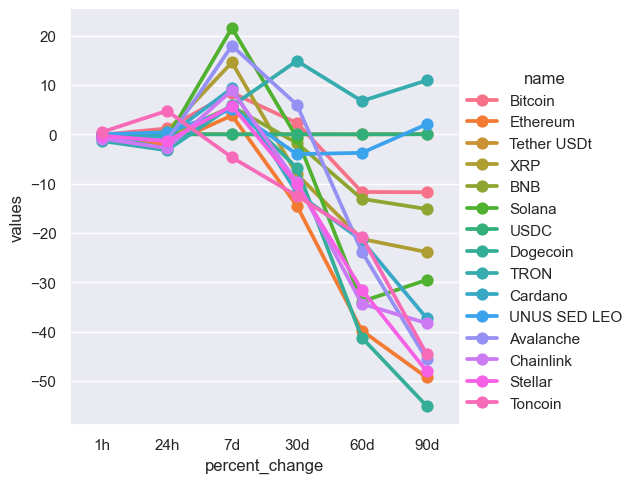

In [111]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')
sns.set(rc = {'figure.figsize' : (10,10)})

In [112]:
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,85702.17158,2025-04-15 16:04:03.751718
0,Bitcoin,85702.17158,2025-04-15 16:04:13.111990
0,Bitcoin,85620.48407,2025-04-15 16:05:13.473260
0,Bitcoin,85676.10823,2025-04-15 16:06:13.862432


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

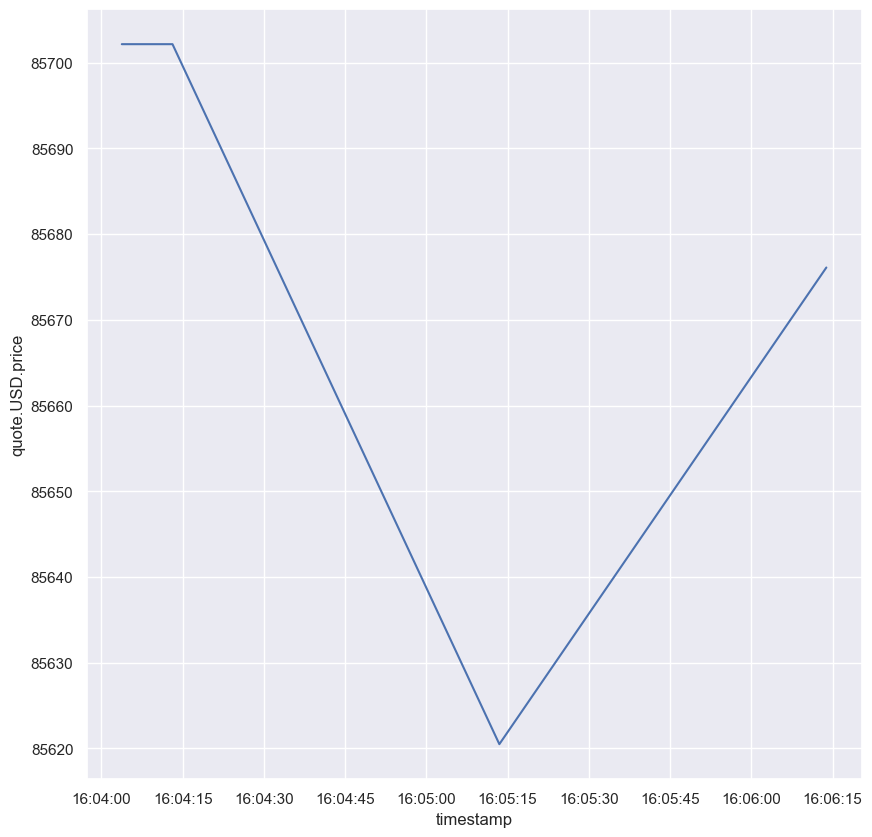

In [113]:
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df9)
